# Classification Exercise

We'll be working with some California Census Data, we'll be trying to use various features of an individual to predict what class of income they belogn in (>50k or <=50k). 

Here is some information about the data:

<table>
<thead>
<tr>
<th>Column Name</th>
<th>Type</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>age</td>
<td>Continuous</td>
<td>The age of the individual</td>
</tr>
<tr>
<td>workclass</td>
<td>Categorical</td>
<td>The type of employer the  individual has (government,  military, private, etc.).</td>
</tr>
<tr>
<td>fnlwgt</td>
<td>Continuous</td>
<td>The number of people the census  takers believe that observation  represents (sample weight). This  variable will not be used.</td>
</tr>
<tr>
<td>education</td>
<td>Categorical</td>
<td>The highest level of education  achieved for that individual.</td>
</tr>
<tr>
<td>education_num</td>
<td>Continuous</td>
<td>The highest level of education in  numerical form.</td>
</tr>
<tr>
<td>marital_status</td>
<td>Categorical</td>
<td>Marital status of the individual.</td>
</tr>
<tr>
<td>occupation</td>
<td>Categorical</td>
<td>The occupation of the individual.</td>
</tr>
<tr>
<td>relationship</td>
<td>Categorical</td>
<td>Wife, Own-child, Husband,  Not-in-family, Other-relative,  Unmarried.</td>
</tr>
<tr>
<td>race</td>
<td>Categorical</td>
<td>White, Asian-Pac-Islander,  Amer-Indian-Eskimo, Other, Black.</td>
</tr>
<tr>
<td>gender</td>
<td>Categorical</td>
<td>Female, Male.</td>
</tr>
<tr>
<td>capital_gain</td>
<td>Continuous</td>
<td>Capital gains recorded.</td>
</tr>
<tr>
<td>capital_loss</td>
<td>Continuous</td>
<td>Capital Losses recorded.</td>
</tr>
<tr>
<td>hours_per_week</td>
<td>Continuous</td>
<td>Hours worked per week.</td>
</tr>
<tr>
<td>native_country</td>
<td>Categorical</td>
<td>Country of origin of the  individual.</td>
</tr>
<tr>
<td>income</td>
<td>Categorical</td>
<td>"&gt;50K" or "&lt;=50K", meaning  whether the person makes more  than \$50,000 annually.</td>
</tr>
</tbody>
</table>

## Follow the Directions in Bold. If you get stuck, check out the solutions lecture.

### THE DATA

** Read in the census_data.csv data with pandas**

In [121]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
census = pd.read_csv("census_data.csv")

In [123]:
census.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [124]:
census.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


** TensorFlow won't be able to understand strings as labels, you'll need to use pandas .apply() method to apply a custom function that converts them to 0s and 1s. This might be hard if you aren't very familiar with pandas, so feel free to take a peek at the solutions for this part.**

** Convert the Label column to 0s and 1s instead of strings.**

In [125]:
census['income_bracket'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [126]:
def label_fix(label):
    if label==' <=50K':
        return 0
    else:
        return 1

In [127]:
census['income_bracket'] = census['income_bracket'].apply(label_fix)

In [128]:
census.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week,income_bracket
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [129]:
#lambda label :int(label=='<=50K')
#census['income_bracket'].apply(lambda label: int(label==' <=50K'))

In [130]:
census.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### Perform a Train Test Split on the Data

In [131]:
from sklearn.model_selection import train_test_split 

In [132]:
census.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income_bracket'],
      dtype='object')

In [133]:
X = census.drop(labels= 'income_bracket', axis=1)
y = census['income_bracket']

In [134]:
X.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


### Encode Label to string features

In [135]:
from sklearn.preprocessing import LabelEncoder

In [136]:
def lableEncode(features):
    le = LabelEncoder()
    return le.fit_transform(features)

In [137]:
X['workclass'] = lableEncode(X['workclass'])
X['education'] = lableEncode(X['education'])
X['marital_status'] = lableEncode(X['marital_status'])
X['occupation'] = lableEncode(X['occupation'])
X['relationship'] = lableEncode(X['relationship'])
X['race'] = lableEncode(X['race'])
X['gender'] = lableEncode(X['gender'])
X['native_country'] = lableEncode(X['native_country'])

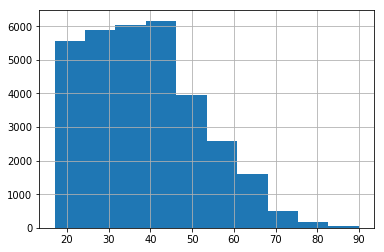

In [138]:
X["age"].hist()

In [139]:
#bins = [0,30,50,70,100]
#labels =[0,1,2,3]
#X["age_buckets"] = pd.cut(X["age"],bins=bins, labels=labels, include_lowest=True)
#X = X.drop("age", axis=1)

In [140]:
X.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country
0,39,7,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,9,13,2,4,0,4,1,0,0,13,39
2,38,4,11,9,0,6,1,4,1,0,0,40,39
3,53,4,1,7,2,6,0,2,1,0,0,40,39
4,28,4,9,13,2,10,5,2,0,0,0,40,5


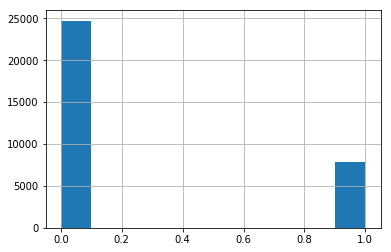

In [141]:
y.hist()

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

# Keras


In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.utils import to_categorical
from tensorflow import keras

In [144]:
model = Sequential()
#model.add(Dense(2,input_shape = (X_train.shape[1],), activation = 'softmax'))
model.add(Dense(10,input_shape = (X_train.shape[1],), activation = 'relu'))
#model.add(keras.layers.Dropout(0.5))
#model.add(Dense(10,activation = 'relu'))
#model.add(keras.layers.Dropout(0.5))
#model.add(Dense(10,activation = 'relu'))
#model.add(keras.layers.Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 22        
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________


In [145]:
adam = Adam(0.001)
#sgd = SGD(0.0001)

In [146]:
y_binary_train= to_categorical(y_train)
y_binary_test = to_categorical(y_test)

In [147]:
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics=['accuracy'])

In [148]:
H = model.fit(X_train, y_binary_train, 
              validation_data=(X_test, y_binary_test),
              epochs = 200,batch_size=32)

Train on 22792 samples, validate on 9769 samples
Epoch 1/200
22792/22792 [==============================] - 4s 164us/step - loss: 2.1302 - acc: 0.6726 - val_loss: 1.7056 - val_acc: 0.7380
Epoch 2/200
22792/22792 [==============================] - 2s 95us/step - loss: 1.6098 - acc: 0.7500 - val_loss: 1.6485 - val_acc: 0.7569
Epoch 3/200
22792/22792 [==============================] - 2s 94us/step - loss: 1.5761 - acc: 0.7563 - val_loss: 1.6261 - val_acc: 0.7592
Epoch 4/200
22792/22792 [==============================] - 2s 96us/step - loss: 1.5582 - acc: 0.7570 - val_loss: 1.6156 - val_acc: 0.7605
Epoch 5/200
22792/22792 [==============================] - 2s 99us/step - loss: 1.5465 - acc: 0.7578 - val_loss: 1.6042 - val_acc: 0.7605
Epoch 6/200
22792/22792 [==============================] - 3s 138us/step - loss: 1.5389 - acc: 0.7577 - val_loss: 1.5990 - val_acc: 0.7606
Epoch 7/200
22792/22792 [==============================] - 2s 99us/step - loss: 1.5324 - acc: 0.7579 - val_loss: 1.5943 -

22792/22792 [==============================] - 2s 91us/step - loss: 1.4847 - acc: 0.7883 - val_loss: 1.5424 - val_acc: 0.7906
Epoch 60/200
22792/22792 [==============================] - 2s 94us/step - loss: 1.4844 - acc: 0.7888 - val_loss: 1.5410 - val_acc: 0.7893
Epoch 61/200
22792/22792 [==============================] - 2s 90us/step - loss: 1.4835 - acc: 0.7886 - val_loss: 1.5456 - val_acc: 0.7855
Epoch 62/200
22792/22792 [==============================] - 2s 87us/step - loss: 1.4840 - acc: 0.7890 - val_loss: 1.5417 - val_acc: 0.7905
Epoch 63/200
22792/22792 [==============================] - 2s 90us/step - loss: 1.4832 - acc: 0.7898 - val_loss: 1.5427 - val_acc: 0.7941
Epoch 64/200
22792/22792 [==============================] - 2s 95us/step - loss: 1.4845 - acc: 0.7878 - val_loss: 1.5533 - val_acc: 0.7813
Epoch 65/200
22792/22792 [==============================] - 2s 93us/step - loss: 1.4837 - acc: 0.7872 - val_loss: 1.5444 - val_acc: 0.7879
Epoch 66/200
22792/22792 [==============

Epoch 118/200
22792/22792 [==============================] - 2s 92us/step - loss: 1.4812 - acc: 0.7914 - val_loss: 1.5415 - val_acc: 0.7895
Epoch 119/200
22792/22792 [==============================] - 2s 96us/step - loss: 1.4818 - acc: 0.7912 - val_loss: 1.5407 - val_acc: 0.7897
Epoch 120/200
22792/22792 [==============================] - 2s 97us/step - loss: 1.4815 - acc: 0.7898 - val_loss: 1.5405 - val_acc: 0.7887
Epoch 121/200
22792/22792 [==============================] - 2s 94us/step - loss: 1.4814 - acc: 0.7909 - val_loss: 1.5387 - val_acc: 0.7942
Epoch 122/200
22792/22792 [==============================] - 2s 92us/step - loss: 1.4816 - acc: 0.7897 - val_loss: 1.5400 - val_acc: 0.7888
Epoch 123/200
22792/22792 [==============================] - 2s 102us/step - loss: 1.4819 - acc: 0.7903 - val_loss: 1.5427 - val_acc: 0.7895
Epoch 124/200
22792/22792 [==============================] - 2s 97us/step - loss: 1.4816 - acc: 0.7894 - val_loss: 1.5404 - val_acc: 0.7905
Epoch 125/200
22792

22792/22792 [==============================] - 2s 91us/step - loss: 1.4809 - acc: 0.7918 - val_loss: 1.5390 - val_acc: 0.7916
Epoch 177/200
22792/22792 [==============================] - 2s 96us/step - loss: 1.4800 - acc: 0.7911 - val_loss: 1.5388 - val_acc: 0.7923
Epoch 178/200
22792/22792 [==============================] - 2s 99us/step - loss: 1.4806 - acc: 0.7915 - val_loss: 1.5389 - val_acc: 0.7917
Epoch 179/200
22792/22792 [==============================] - 2s 99us/step - loss: 1.4806 - acc: 0.7904 - val_loss: 1.5377 - val_acc: 0.7954
Epoch 180/200
22792/22792 [==============================] - 2s 98us/step - loss: 1.4805 - acc: 0.7892 - val_loss: 1.5379 - val_acc: 0.7925
Epoch 181/200
22792/22792 [==============================] - 2s 100us/step - loss: 1.4802 - acc: 0.7915 - val_loss: 1.5394 - val_acc: 0.7921
Epoch 182/200
22792/22792 [==============================] - 2s 104us/step - loss: 1.4802 - acc: 0.7900 - val_loss: 1.5382 - val_acc: 0.7924
Epoch 183/200
22792/22792 [=====

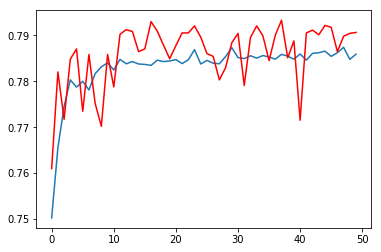

In [119]:
plt.plot(H.history['acc'])
plt.plot(H.history['val_acc'], 'r')

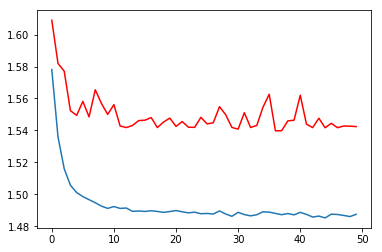

In [120]:
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'], 'r')

In [112]:
y_pred_cat = model.predict(X_test)

In [78]:
y_pred = np.argmax(y_pred_cat, axis=1)

In [79]:
from sklearn.metrics import classification_report

In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      7436
           1       0.00      0.00      0.00      2333

   micro avg       0.76      0.76      0.76      9769
   macro avg       0.38      0.50      0.43      9769
weighted avg       0.58      0.76      0.66      9769



## Tensorflow



### Create the Feature Columns for tf.esitmator

** Take note of categorical vs continuous values! **

** Import Tensorflow **

** Create the tf.feature_columns for the categorical values. Use vocabulary lists or just use hash buckets. **

In [330]:
workclass = tf.feature_column.categorical_column_with_hash_bucket('workclass',hash_bucket_size=1000)
education = tf.feature_column.categorical_column_with_hash_bucket('education',hash_bucket_size=1000)
marital_status = tf.feature_column.categorical_column_with_hash_bucket('marital_status',hash_bucket_size=1000)
occupation = tf.feature_column.categorical_column_with_hash_bucket('occupation',hash_bucket_size=1000)
relationship = tf.feature_column.categorical_column_with_hash_bucket('relationship',hash_bucket_size=1000)
race = tf.feature_column.categorical_column_with_hash_bucket('race',hash_bucket_size=1000)
gender = tf.feature_column.categorical_column_with_hash_bucket('gender',hash_bucket_size=10)
native_country = tf.feature_column.categorical_column_with_hash_bucket('native_country',hash_bucket_size=1000)


** Create the continuous feature_columns for the continuous values using numeric_column **

In [331]:
age = tf.feature_column.numeric_column('age')
education_num = tf.feature_column.numeric_column('education_num')
capital_gain = tf.feature_column.numeric_column('capital_gain')
capital_loss = tf.feature_column.numeric_column('capital_loss')
hours_per_week = tf.feature_column.numeric_column('hours_per_week')

** Put all these variables into a single list with the variable name feat_cols **

In [332]:
feat_cols = [age, workclass, education, education_num, marital_status,
       occupation, relationship, race, gender, capital_gain,
       capital_loss, hours_per_week, native_country]

### Create Input Function

** Batch_size is up to you. But do make sure to shuffle!**

In [333]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=100,num_epochs=None,shuffle=True)

#### Create your model with tf.estimator

**Create a LinearClassifier.(If you want to use a DNNClassifier, keep in mind you'll need to create embedded columns out of the cateogrical feature that use strings, check out the previous lecture on this for more info.)**

In [334]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/q_/7b87rxq97d74fk63y0b6xcy80000gn/T/tmpa5etbq7o', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a1fe35f98>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


** Train your model on the data, for at least 5000 steps. **

In [335]:
model.train(input_fn=input_func,steps=5000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/q_/7b87rxq97d74fk63y0b6xcy80000gn/T/tmpa5etbq7o/model.ckpt.
INFO:tensorflow:loss = 69.31474, step = 1
INFO:tensorflow:global_step/sec: 192.433
INFO:tensorflow:loss = 0.00035486039, step = 101 (0.521 sec)
INFO:tensorflow:global_step/sec: 264.805
INFO:tensorflow:loss = 3.6905472e-05, step = 201 (0.379 sec)
INFO:tensorflow:global_step/sec: 292.112
INFO:tensorflow:loss = 6.332671e-05, step = 301 (0.343 sec)
INFO:tensorflow:global_step/sec: 299.829
INFO:tensorflow:loss = 0.00060355786, step = 401 (0.334 sec)
INFO:tensorflow:global_step/sec: 344.996
INFO:tensorflow:loss = 0.0002679027, step = 501 (0.290 sec)
INFO:tensorflow:global_step/sec: 261.138
INFO:tensorflow:loss = 5.5205506e-05, step = 601 (0.381 sec)
INFO:tensorflow:global_step/sec: 262.962
INFO:tensorflow:loss = 0.00017909532, step = 701 (0.381 sec)
INFO:tensorflow:global_step/sec: 327.915
INFO:tensorflow:loss = 0.00012366571, step

### Evaluation

** Create a prediction input function. Remember to only supprt X_test data and keep shuffle=False. **

In [336]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

In [337]:
#evaluation_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=len(X_test),num_epochs=None,shuffle=False)

** Use model.predict() and pass in your input function. This will produce a generator of predictions, which you can then transform into a list, with list() **

In [338]:
predictions = list(model.predict(input_fn=pred_fn))

INFO:tensorflow:Restoring parameters from /var/folders/q_/7b87rxq97d74fk63y0b6xcy80000gn/T/tmpa5etbq7o/model.ckpt-5000


In [347]:
eva_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=len(X_test),shuffle=False)
model.evaluate(eva_fn)

INFO:tensorflow:Starting evaluation at 2018-03-18-13:04:42
INFO:tensorflow:Restoring parameters from /var/folders/q_/7b87rxq97d74fk63y0b6xcy80000gn/T/tmpa5etbq7o/model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2018-03-18-13:04:43
INFO:tensorflow:Saving dict for global step 5000: accuracy = 1.0, accuracy_baseline = 1.0, auc = 0.0, auc_precision_recall = 1.0, average_loss = 1.7344979e-06, global_step = 5000, label/mean = 1.0, loss = 0.01694431, prediction/mean = 0.9999988


{'accuracy': 1.0,
 'accuracy_baseline': 1.0,
 'auc': 0.0,
 'auc_precision_recall': 1.0,
 'average_loss': 1.7344979e-06,
 'global_step': 5000,
 'label/mean': 1.0,
 'loss': 0.01694431,
 'prediction/mean': 0.9999988}

In [340]:
type(predictions)

list

** Each item in your list will look like this: **

In [341]:
predictions[0]

{'class_ids': array([1]),
 'classes': array([b'1'], dtype=object),
 'logistic': array([1.], dtype=float32),
 'logits': array([21.99997], dtype=float32),
 'probabilities': array([2.7895533e-10, 1.0000000e+00], dtype=float32)}

In [342]:
predictions[0]['class_ids'][0]

1

** Create a list of only the class_ids key values from the prediction list of dictionaries, these are the predictions you will use to compare against the real y_test values. **

In [343]:
result = []
for pred in predictions:
    result.append(pred['class_ids'][0])

In [344]:
result[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

** Import classification_report from sklearn.metrics and then see if you can figure out how to use it to easily get a full report of your model's performance on the test data. **

In [345]:
from sklearn.metrics import classification_report

In [346]:
print(classification_report(y_test,result))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00      9769

avg / total       1.00      1.00      1.00      9769



# Great Job!